Reading different indicator's data (from start date to present) which was downloaded from provided website links :

In [1]:
NAI<- read.csv('C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/SSGA_internship_assignment/Assignment_1/CFNAI.csv')
NAI$DATE <- as.Date(NAI$DATE)

CPI<- read.csv('C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/SSGA_internship_assignment/Assignment_1/CPIAUCSL.csv')
CPI$DATE <- as.Date(CPI$DATE)

us_dollar_index<- read.csv('C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/SSGA_internship_assignment/Assignment_1/TWEXBGSMTH.csv')
us_dollar_index$DATE <- as.Date(us_dollar_index$DATE)

t_bills_2Y_yield<- read.csv('C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/SSGA_internship_assignment/Assignment_1/GS2.csv')
t_bills_2Y_yield$DATE <- as.Date(t_bills_2Y_yield$DATE)

credit_spread<- read.csv('C:/Users/hrith/OneDrive/Documents/RESUME_PROJECTS_COPY/SSGA_internship_assignment/Assignment_1/BAMLH0A0HYM2.csv')
credit_spread$DATE <- as.Date(credit_spread$DATE)

In [2]:
# Importing necessary libraries

library(dplyr)
library(ggplot2)
library(zoo)
library(lubridate)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [3]:
# Calculating the 12-month percentage change , i.e yearly inflation and making it a new column
CPI <- CPI %>%
  mutate(yearly_inflation = (CPIAUCSL / lag(CPIAUCSL, 12) - 1) * 100)

# Calculating the change in yearly inflation every month and making these new columns
CPI <- CPI %>%
  mutate(y_diff = yearly_inflation - lag(yearly_inflation, 1))

# Calculating the 24 and 6 month moving average of yearly in flation (as per the discussed strategy in Notebook1)
yearly_inflation <- as.ts(CPI$yearly_inflation)
CPI$ma_24m <- rollapply(yearly_inflation, width = 24, FUN = mean, align = "right", fill = NA)
CPI$ma_6m <- rollapply(yearly_inflation, width = 6, FUN = mean, align = "right", fill = NA)

CPI <- CPI %>%
  mutate(ma_6m_diff_ma_24m = ma_6m - ma_24m)    # taking the difference of above made columns for making the indicator


In [4]:
cat("Initial rows of CPI data:", "\n")
head(CPI)

Initial rows of CPI data: 


DATE,CPIAUCSL,yearly_inflation,y_diff,ma_24m,ma_6m,ma_6m_diff_ma_24m
1947-01-01,21.48,NA,NA,NA,NA,NA
1947-02-01,21.62,NA,NA,NA,NA,NA
1947-03-01,22.00,NA,NA,NA,NA,NA
1947-04-01,22.00,NA,NA,NA,NA,NA
1947-05-01,21.95,NA,NA,NA,NA,NA
1947-06-01,22.08,NA,NA,NA,NA,NA


Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
"Removed 35 rows containing missing values (geom_path)."Warning message:
"Removed 17 rows containing missing values (geom_path)."

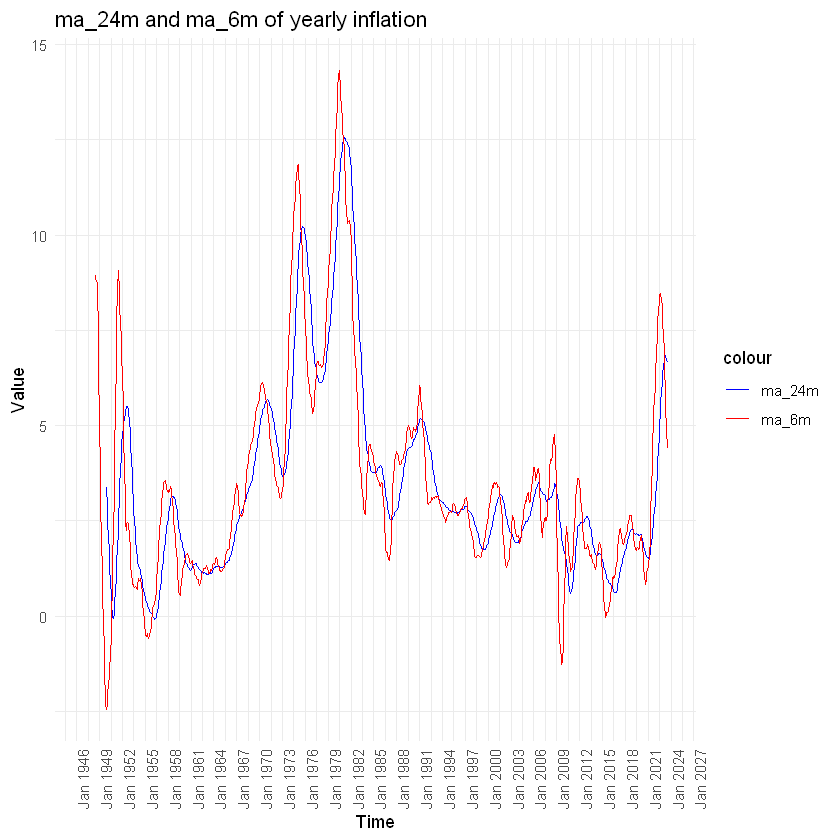

In [5]:
# Creating a line plot of 24m and 6m moving avg
ggplot(CPI, aes(x = DATE)) +
  geom_line(aes(y = ma_24m, group = 1, color = "ma_24m")) +
  geom_line(aes(y = ma_6m, group = 1, color = "ma_6m")) +
  labs(x = "Time", y = "Value", title = "ma_24m and ma_6m of yearly inflation") +
  scale_color_manual(values = c("ma_24m" = "blue", "ma_6m" = "red")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_x_date(date_breaks = "3 year", date_labels = "%b %Y")  # Gap of 3 year

In [6]:
# Calculating the yearly change in dollar index and making it a new column
us_dollar_index <- us_dollar_index %>%
  mutate(y_diff = TWEXBGSMTH - lag(TWEXBGSMTH, 12))

# Calculating the 12 and 3 month moving average of us dollar index and making these as new columns
#(as per the discussed strategy in Notebook1)
TWEXBGSMTH <- as.ts(us_dollar_index$TWEXBGSMTH)
us_dollar_index$ma_12m <- rollapply(TWEXBGSMTH, width = 12, FUN = mean, align = "right", fill = NA)
us_dollar_index$ma_3m <- rollapply(TWEXBGSMTH, width = 3, FUN = mean, align = "right", fill = NA)

us_dollar_index <- us_dollar_index %>%
  mutate(ma_3m_diff_ma_12m = ma_3m - ma_12m)    # taking the difference of above made columns for making the indicator

In [7]:
cat("Initial rows of us_dollar_index data:", "\n")
head(us_dollar_index)

Initial rows of us_dollar_index data: 


DATE,TWEXBGSMTH,y_diff,ma_12m,ma_3m,ma_3m_diff_ma_12m
2006-01-01,100.0000,NA,NA,NA,NA
2006-02-01,100.2112,NA,NA,NA,NA
2006-03-01,100.4281,NA,NA,100.21310,NA
2006-04-01,99.7435,NA,NA,100.12760,NA
2006-05-01,97.5118,NA,NA,99.22780,NA
2006-06-01,98.6927,NA,NA,98.64933,NA


Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
"Removed 11 rows containing missing values (geom_path)."Warning message:
"Removed 2 rows containing missing values (geom_path)."

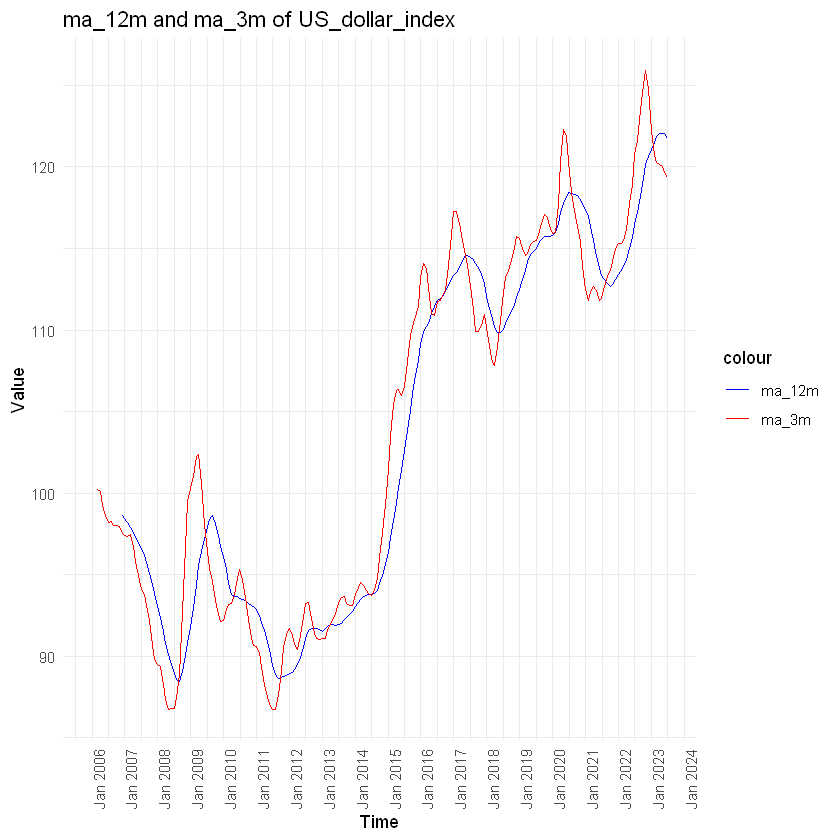

In [8]:
# Creating a line plot of 12m and 3m moving avg
ggplot(us_dollar_index, aes(x = DATE)) +
  geom_line(aes(y = ma_12m, group = 1, color = "ma_12m")) +
  geom_line(aes(y = ma_3m, group = 1, color = "ma_3m")) +
  labs(x = "Time", y = "Value", title = "ma_12m and ma_3m of US_dollar_index") +
  scale_color_manual(values = c("ma_12m" = "blue", "ma_3m" = "red")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_x_date(date_breaks = "1 year", date_labels = "%b %Y")  # Gap of 1 year

In [9]:
# Calculating the yearly change in 2 years yield of US treasury bills and making it a new column
t_bills_2Y_yield <- t_bills_2Y_yield %>%
  mutate(y_diff = GS2 - lag(GS2, 12))

# Calculating the 24 and 6 month moving average of us dollar index and making these as new columns
#(as per the discussed strategy in Notebook1)
GS2 <- as.ts(t_bills_2Y_yield$GS2)
t_bills_2Y_yield$ma_24m <- rollapply(GS2, width = 24, FUN = mean, align = "right", fill = NA)
t_bills_2Y_yield$ma_6m <- rollapply(GS2, width = 6, FUN = mean, align = "right", fill = NA)

t_bills_2Y_yield <- t_bills_2Y_yield %>%
  mutate(ma_6m_diff_ma_24m = ma_6m - ma_24m)   # taking the difference of above made columns for making the indicator

In [10]:
cat("Initial rows of t_bills_2Y_yield data:", "\n")
head(t_bills_2Y_yield)

Initial rows of t_bills_2Y_yield data: 


DATE,GS2,y_diff,ma_24m,ma_6m,ma_6m_diff_ma_24m
1976-06-01,7.06,NA,NA,NA,NA
1976-07-01,6.85,NA,NA,NA,NA
1976-08-01,6.63,NA,NA,NA,NA
1976-09-01,6.42,NA,NA,NA,NA
1976-10-01,5.98,NA,NA,NA,NA
1976-11-01,5.81,NA,NA,6.458333,NA


Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
"Removed 23 rows containing missing values (geom_path)."Warning message:
"Removed 5 rows containing missing values (geom_path)."

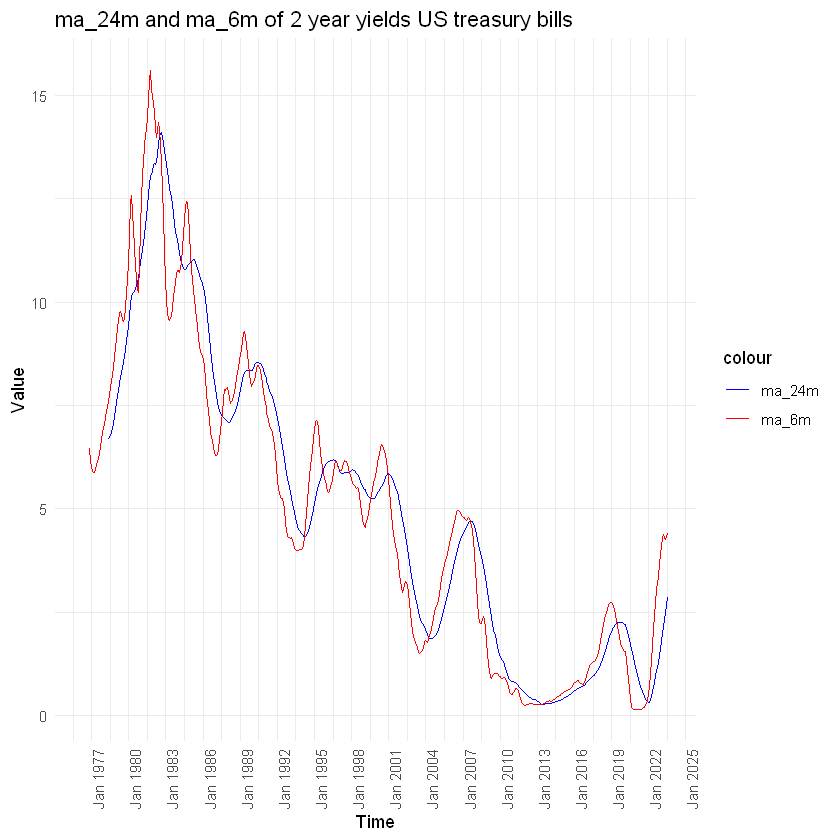

In [11]:
# Creating a line plot of 24m and 6m moving avg
ggplot(t_bills_2Y_yield, aes(x = DATE)) +
  geom_line(aes(y = ma_24m, group = 1, color = "ma_24m")) +
  geom_line(aes(y = ma_6m, group = 1, color = "ma_6m")) +
  labs(x = "Time", y = "Value", title = "ma_24m and ma_6m of 2 year yields US treasury bills") +
  scale_color_manual(values = c("ma_24m" = "blue", "ma_6m" = "red")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_x_date(date_breaks = "3 year", date_labels = "%b %Y")  # Gap of 3 year

In [12]:
# data cleaning and pre-processing of US credit spreads this same as Notebook1

In [13]:
data_types <- sapply(credit_spread$BAMLH0A0HYM2, class)
cat("Following are the datatypes of BAMLH0A0HYM2 column :", "\n")
print(data_types)

credit_spread$BAMLH0A0HYM2 <- as.numeric(as.character(credit_spread$BAMLH0A0HYM2))

credit_spread$BAMLH0A0HYM2[is.na(credit_spread$BAMLH0A0HYM2)] <- 
  lag(credit_spread$BAMLH0A0HYM2)[is.na(credit_spread$BAMLH0A0HYM2)]

Following are the datatypes of BAMLH0A0HYM2 column : 
   [1] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
   [9] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [17] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [25] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [33] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [41] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [49] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [57] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [65] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [73] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [81] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
  [89] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [14]:
# Creating a new data frame with monthly average
credit_spread_monthly <- credit_spread %>%
  mutate(DATE = format(DATE, "%Y-%m")) %>%
  group_by(DATE) %>%
  summarise(monthly = mean(BAMLH0A0HYM2))

# Printing initial rows of resulting data frame
#cat(" Initial rows of credit_spread_monthly :", "\n")
#head(credit_spread_monthly)

#adding the date value as 1 to convert the entries of DATE column into yyyy-mm-dd format
credit_spread_monthly <- credit_spread_monthly %>%
  mutate(DATE = paste(DATE, "01", sep = "-"))

# Printing initial rows of resulting data frame
#cat(" Initial rows of rectified credit_spread_monthly :", "\n")
#head(credit_spread_monthly)

credit_spread_monthly$DATE <- as.Date(credit_spread_monthly$DATE)    #finally changing DATE column to date format

# again replacing NA (if any) with is immediate previous value
credit_spread_monthly$monthly[is.na(credit_spread_monthly$monthly)] <- 
  lag(credit_spread_monthly$monthly)[is.na(credit_spread_monthly$monthly)]

In [15]:
# Calculating the yearly change in credit_spreads and making it as new column
credit_spread_monthly <- credit_spread_monthly %>%
  mutate(y_diff = monthly - lag(monthly, 12))

# Calculating the 12 and 3 month moving average of credit_spreads and making these as new columns
#(as per the discussed strategy in Notebook1)
monthly <- as.ts(credit_spread_monthly$monthly)
credit_spread_monthly$ma_12m <- rollapply(monthly, width = 12, FUN = mean, align = "right", fill = NA)
credit_spread_monthly$ma_3m <- rollapply(monthly, width = 3, FUN = mean, align = "right", fill = NA)

credit_spread_monthly <- credit_spread_monthly %>%
  mutate(ma_3m_diff_ma_12m = ma_3m - ma_12m)    ## taking the difference of above made columns for making the indicator

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
"Removed 11 rows containing missing values (geom_path)."Warning message:
"Removed 2 rows containing missing values (geom_path)."

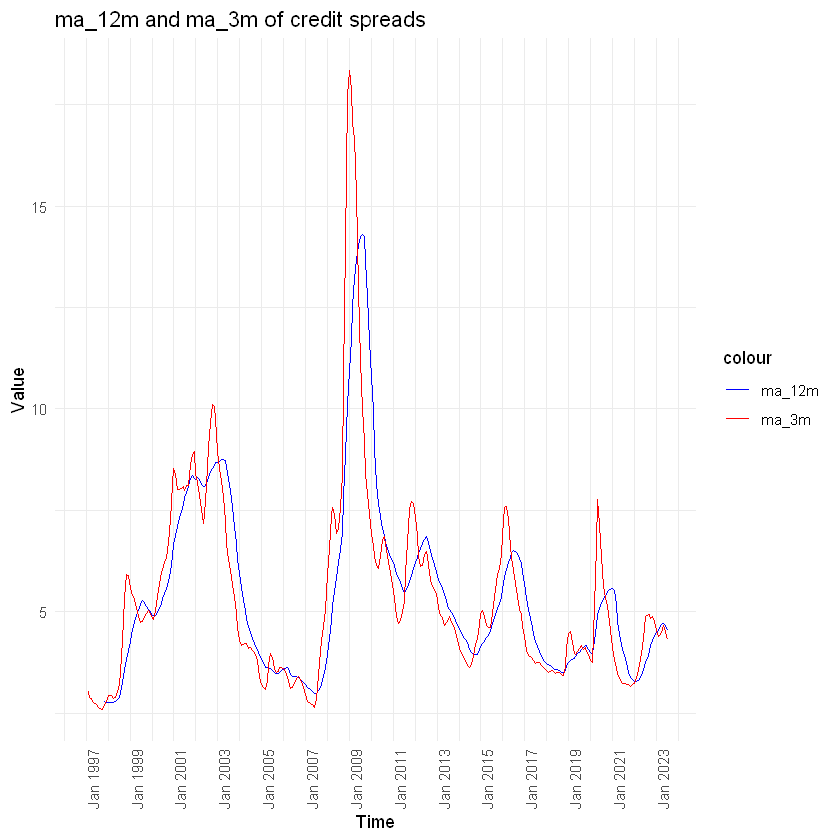

In [16]:
# Creating a line plot of 12m and 3m moving avg
ggplot(credit_spread_monthly, aes(x = DATE)) +
  geom_line(aes(y = ma_12m, group = 1, color = "ma_12m")) +
  geom_line(aes(y = ma_3m, group = 1, color = "ma_3m")) +
  labs(x = "Time", y = "Value", title = "ma_12m and ma_3m of credit spreads") +
  scale_color_manual(values = c("ma_12m" = "blue", "ma_3m" = "red")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_x_date(date_breaks = "2 year", date_labels = "%b %Y")  # Gap of 2 year

In [17]:
# We will not any kind of moving avg for NAI because its +ve value itself tells that the national economy is expanding 
#above its historical trend rate of growth and vice versa.

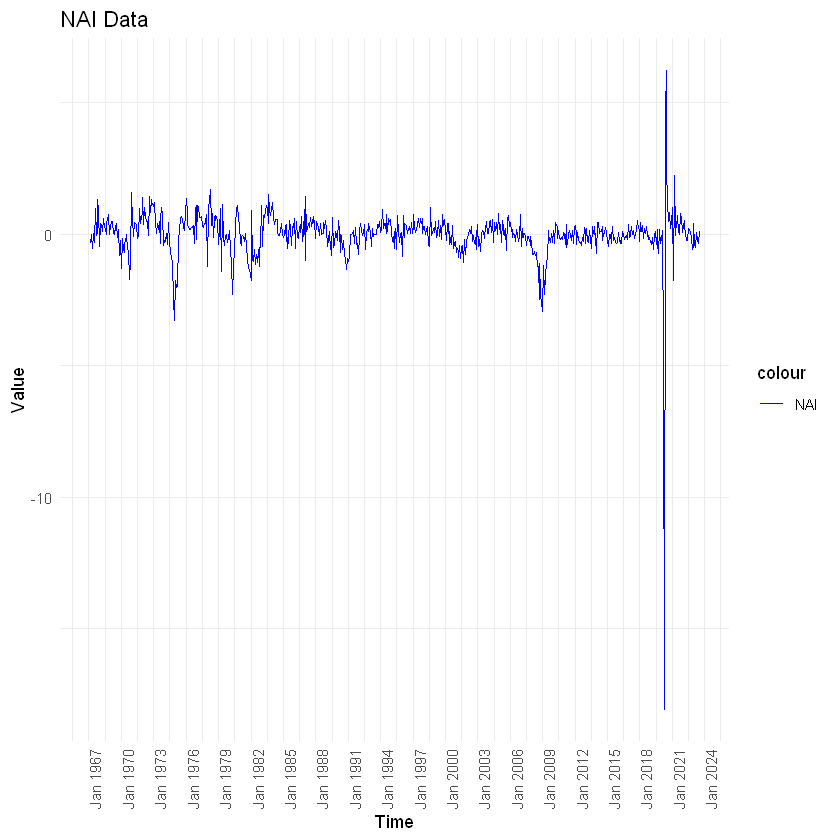

In [18]:
# Create a line plot with ggplot2
ggplot(NAI, aes(x = DATE)) +
  geom_line(aes(y = CFNAI, group = 1, color = "NAI")) +
  labs(x = "Time", y = "Value", title = "NAI Data") +
  scale_color_manual(values = c("NAI" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_x_date(date_breaks = "3 year", date_labels = "%b %Y")  # Gap of 3 year

In [19]:
#Extracting the indices of below specified start and end date
#Will back test the strategy between the below secified start and end date, hence would like to have value of all 
#indicators in sigle dataframe between these dates.

start_date <- as.Date("2006-01-01") 
end_date <- as.Date("2023-07-01")

# NAI
s_NAI <- which(NAI$DATE == start_date)
e_NAI <- which(NAI$DATE == end_date)
print(paste(" NAI data index of 2006-01-01 :" ,s_NAI))
print(paste(" NAI data index of 2023-07-01 :" ,e_NAI))
cat(" ", "\n")

# CPI
s_CPI <- which(CPI$DATE == start_date)
e_CPI <- which(CPI$DATE == end_date)
print(paste(" CPI data index of 2006-01-01 :" ,s_CPI))
print(paste(" CPI data index of 2023-07-01 :" ,e_CPI))
cat(" ", "\n")

# us_dollar_index
s_us_dollar_index <- which(us_dollar_index$DATE == start_date)
e_us_dollar_index <- which(us_dollar_index$DATE == end_date)
print(paste(" us_dollar_index data index of 2006-01-01 :" ,s_us_dollar_index))
print(paste(" us_dollar_index data index of 2023-07-01 :" ,e_us_dollar_index))
cat(" ", "\n")

# t_bills_2Y_yield
s_t_bills_2Y_yield <- which(t_bills_2Y_yield$DATE == start_date)
e_t_bills_2Y_yield <- which(t_bills_2Y_yield$DATE == end_date)
print(paste(" t_bills_2Y_yield data index of 2006-01-01 :" ,s_t_bills_2Y_yield))
print(paste(" t_bills_2Y_yield data index of 2023-07-01 :" ,e_t_bills_2Y_yield))
cat(" ", "\n")

# credit_spread_monthly
s_credit_spread_monthly <- which(credit_spread_monthly$DATE == start_date)
e_credit_spread_monthly <- which(credit_spread_monthly$DATE == end_date)
print(paste(" credit_spread_monthly data index of 2006-01-01 :" ,s_credit_spread_monthly))
print(paste(" credit_spread_monthly data index of 2023-07-01 :" ,e_credit_spread_monthly))

[1] " NAI data index of 2006-01-01 : 467"
[1] " NAI data index of 2023-07-01 : 677"
  
[1] " CPI data index of 2006-01-01 : 709"
[1] " CPI data index of 2023-07-01 : 919"
  
[1] " us_dollar_index data index of 2006-01-01 : 1"
[1] " us_dollar_index data index of 2023-07-01 : 211"
  
[1] " t_bills_2Y_yield data index of 2006-01-01 : 356"
[1] " t_bills_2Y_yield data index of 2023-07-01 : 566"
  
[1] " credit_spread_monthly data index of 2006-01-01 : 110"
[1] " credit_spread_monthly data index of 2023-07-01 : 320"


In [20]:
# Just like in previous notebook , will make a dataframe of all indicators between start and end date.

combined_list <- list()

#NAI
selected_df <- NAI %>%
    slice(s_NAI:e_NAI) %>%
    select(date= DATE, indicator_1 = CFNAI)
combined_list[[1]] <- selected_df

#CPI
selected_df <- CPI %>%
    slice(s_CPI:e_CPI) %>%
    select(indicator_2a = y_diff, indicator_2b = ma_6m_diff_ma_24m)
combined_list[[2]] <- selected_df

#us_dollar_index
selected_df <- us_dollar_index %>%
    slice(s_us_dollar_index:e_us_dollar_index) %>%
    select(indicator_3a = y_diff, indicator_3b = ma_3m_diff_ma_12m)
combined_list[[3]] <- selected_df

#t_bills_2Y_yield
selected_df <- t_bills_2Y_yield %>%
    slice(s_t_bills_2Y_yield:e_t_bills_2Y_yield) %>%
    select(indicator_4a = y_diff, indicator_4b = ma_6m_diff_ma_24m)
combined_list[[4]] <- selected_df

#credit_spread_monthly
selected_df <- credit_spread_monthly %>%
    slice(s_credit_spread_monthly:e_credit_spread_monthly) %>%
    select(indicator_5a = y_diff, indicator_5b = ma_3m_diff_ma_12m)
combined_list[[5]] <- selected_df

#Combining the sliced dataframes stored in combined_list
Indicators_data <- bind_cols(combined_list)

In [21]:
# Removing initial rows with some null values which has been created due to moving avg 
Indicators_data <- na.omit(Indicators_data)

In [22]:
cat(" Initial rows of Indicators_data :", "\n")
head(Indicators_data)

 Initial rows of Indicators_data : 


,date,indicator_1,indicator_2a,indicator_2b,indicator_3a,indicator_3b,indicator_4a,indicator_4b,indicator_5a,indicator_5b
13,2007-01-01,-0.48,-0.44821261,-0.9469720,-2.1662,-1.0508500,0.48,0.3912500,-0.7853557,-0.2259669
14,2007-02-01,0.19,0.34449560,-1.1716580,-2.7348,-0.8352500,0.18,0.3216667,-0.7145000,-0.3395919
15,2007-03-01,0.23,0.37793651,-1.0236103,-3.4163,-0.4783250,-0.16,0.2533333,-0.3917391,-0.3514924
16,2007-04-01,-0.11,-0.20527253,-0.7938081,-4.1113,-0.8695833,-0.22,0.1891667,-0.3180952,-0.3336249
17,2007-05-01,0.03,0.11696098,-0.6636358,-2.7893,-1.5551083,-0.20,0.1470833,-0.4526087,-0.3140452
18,2007-06-01,-0.05,-0.01712063,-0.6418270,-4.2478,-2.0567583,-0.14,0.1429167,-0.6681818,-0.3407876


In [23]:
# indicator_1 -> NAI

# indicator_2a -> monthly change in yearly inflation
# indicator_2b -> (6m_ma - 24m_ma) of yearly inflation

# indicator_3a -> yearly difference of US dolar index in current month
# indicator_3b -> (3m_ma - 12m_ma) of US dolar index

# indicator_4a -> yearly difference of t_bills_2Y_yield in current month
# indicator_4b -> (6m_ma - 24m_ma) of t_bills_2Y_yield

# indicator_5a -> yearly difference of credit_spread_monthly in current month
# indicator_5b -> (3m_ma - 12m_ma) of credit_spread_monthly

In [24]:
#shifting the date forward by one month so that in order to take the investment decision for the next month, 
#I would be have to just see the corresponding indicator values of that month row itself
Indicators_data$date <- Indicators_data$date %m+% months(1) 

In [25]:
cat(" Initial rows of Indicators_data :", "\n")
head(Indicators_data)

 Initial rows of Indicators_data : 


,date,indicator_1,indicator_2a,indicator_2b,indicator_3a,indicator_3b,indicator_4a,indicator_4b,indicator_5a,indicator_5b
13,2007-02-01,-0.48,-0.44821261,-0.9469720,-2.1662,-1.0508500,0.48,0.3912500,-0.7853557,-0.2259669
14,2007-03-01,0.19,0.34449560,-1.1716580,-2.7348,-0.8352500,0.18,0.3216667,-0.7145000,-0.3395919
15,2007-04-01,0.23,0.37793651,-1.0236103,-3.4163,-0.4783250,-0.16,0.2533333,-0.3917391,-0.3514924
16,2007-05-01,-0.11,-0.20527253,-0.7938081,-4.1113,-0.8695833,-0.22,0.1891667,-0.3180952,-0.3336249
17,2007-06-01,0.03,0.11696098,-0.6636358,-2.7893,-1.5551083,-0.20,0.1470833,-0.4526087,-0.3140452
18,2007-07-01,-0.05,-0.01712063,-0.6418270,-4.2478,-2.0567583,-0.14,0.1429167,-0.6681818,-0.3407876


In [26]:
# saving the indicators data as a csv file
#write.csv(Indicators_data, "Indicators_data.csv", row.names = FALSE)